# [Northeastern](https://www.northeastern.edu/) final project  

# Predicting heart diseases ❤️

This notebook uses this [Kaggle data set](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=heart_2020_cleaned.csv)

1.Import libraries and modules
2.Import dataset
3.pre-process dataset(cleaning missing data,encoding,train/test splitting)
4. Train models
5. Test models

## Importing modules and data 📥

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [2]:
heart_df=pd.read_csv('/work/archive-20220531-152154/heart_2020_cleaned.csv')


In [3]:
heart_df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

## Exploratory Data Analysis 🚀

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
heart_df['MentalHealth'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

In [6]:
heart_df['MentalHealth'].value_counts()

0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
3.0      10466
15.0      9896
1.0       9291
7.0       5528
20.0      5431
4.0       5379
14.0      2048
25.0      1954
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64

How many days out of the 30 days was your mental health bad?

In [7]:
#understand characteristics of your data
heart_df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

The code above describes the average, standard deviation, min, and max relation between BMI💪,Physical/Mental Health👨‍⚕️, and Sleep Time😴

In [9]:
heart_df['SleepTime'].value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

The code block above tells us the average sleeptime amongst individuals 

In [10]:
heart_df.shape

(319795, 18)

The code block above ⬆️ tells us that there are 319795 rows (onservations) and 18 columns in the data set.

In [11]:
# Are there any missing values?
heart_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Exploratory Data Visualization 📈

I used ["data to viz"](https://www.data-to-viz.com/) cite to explore various varibales visually

### Visualizing Distribution

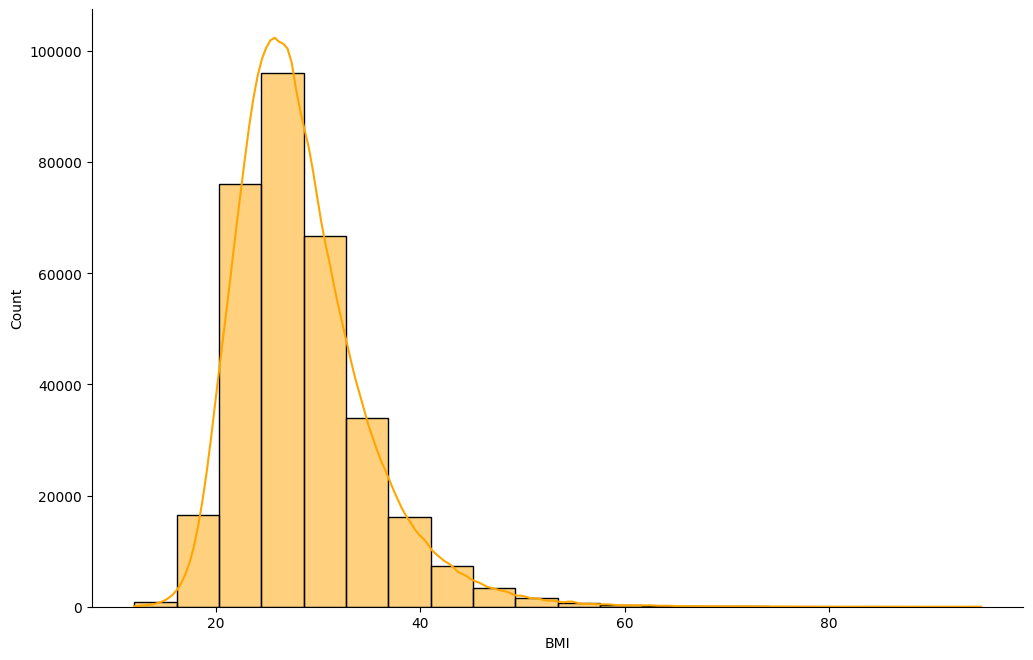

In [12]:
 g = sns.displot(heart_df['BMI'],
            color="orange",
            kde=True, # disables kde
            bins=20)
g.fig.set_figwidth(12) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart

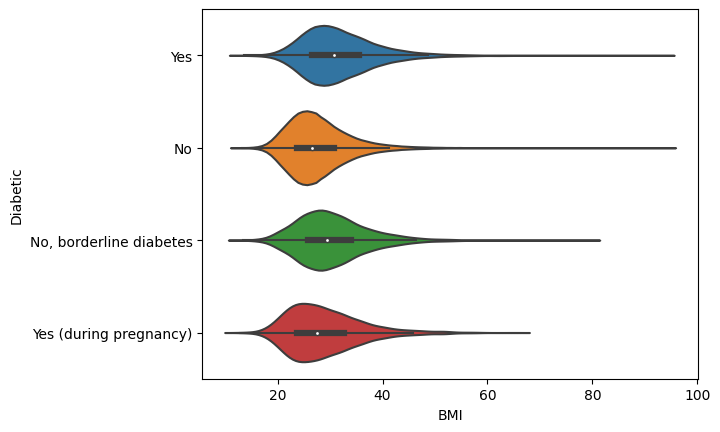

In [13]:

#A violin plot allow to visualize the distribution of a numeric variable for one or several groups
# plot
sns.violinplot(y=heart_df["Diabetic"], x=heart_df["BMI"])
plt.show()

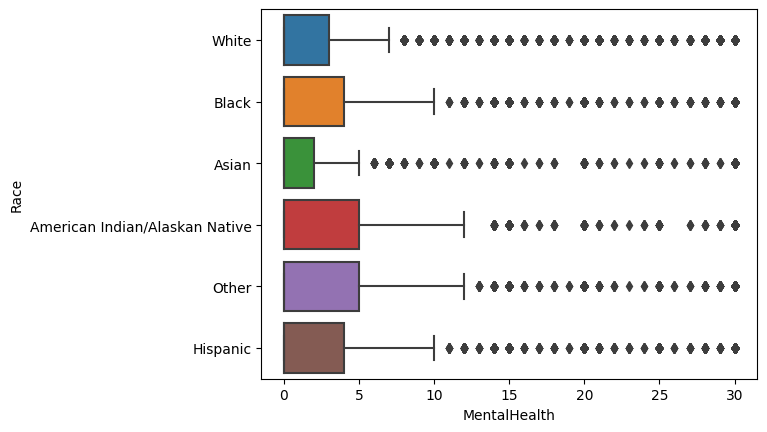

In [14]:
# Distribution of mental health across races

sns.boxplot(x="MentalHealth", y="Race", data = heart_df);

### Visualizing descriptive statistics

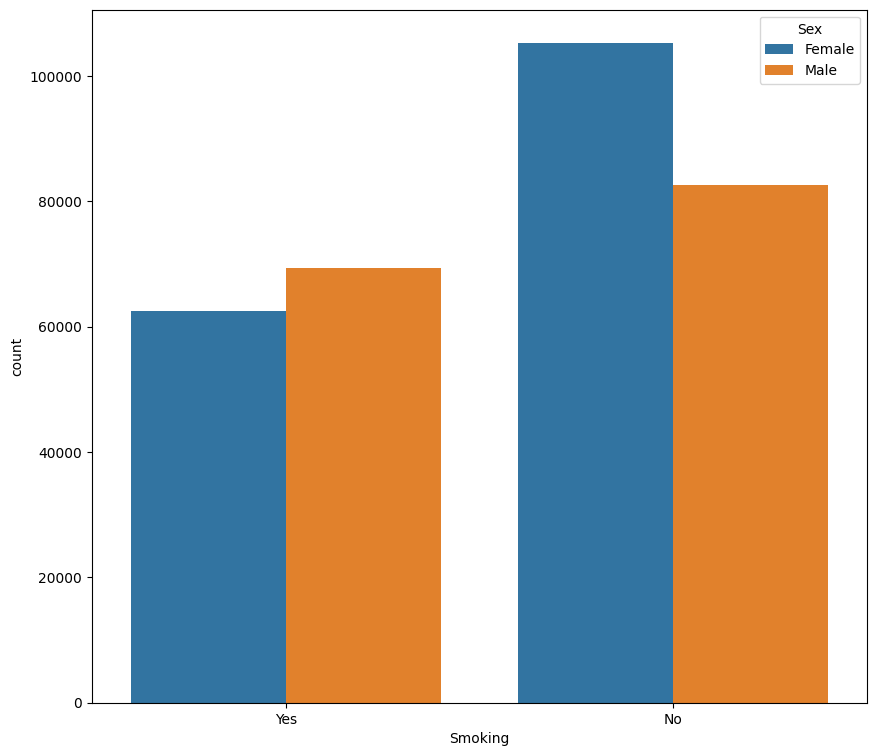

In [15]:
ax, fig = plt.subplots(figsize=[10,9]) # sets figure size
sns.countplot(x='Smoking', hue='Sex', data=heart_df) # for purely categorical
plt.show()

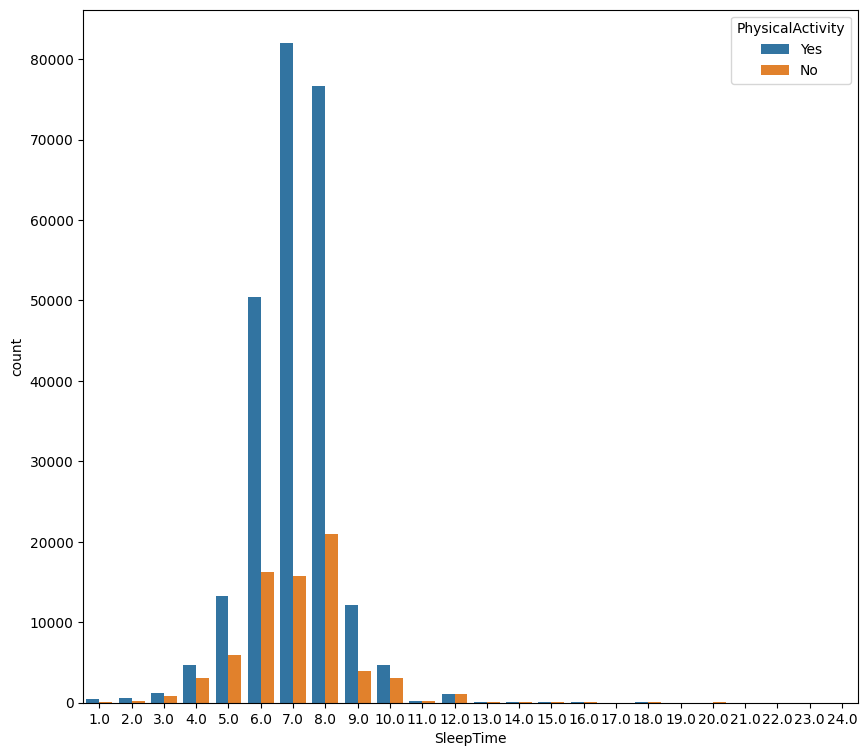

In [16]:
ax, fig = plt.subplots(figsize=[10,9]) # sets figure size
sns.countplot(x='SleepTime', hue='PhysicalActivity', data=heart_df) # for purely categorical
plt.show()

In [17]:
cross_SleepTime=pd.crosstab(heart_df.SleepTime,heart_df.PhysicalActivity)
print('PhysicalActivity + SleepTime :',
      round(cross_SleepTime.iloc[1,1]/cross_SleepTime.iloc[1,0]*100,2),'%')
print('PhysicalActivity - SleepTime :',
      round(cross_SleepTime.iloc[0,1]/cross_SleepTime.iloc[0,0]*100,2),'%')

PhysicalActivity + SleepTime : 219.03 %
PhysicalActivity - SleepTime : 580.25 %


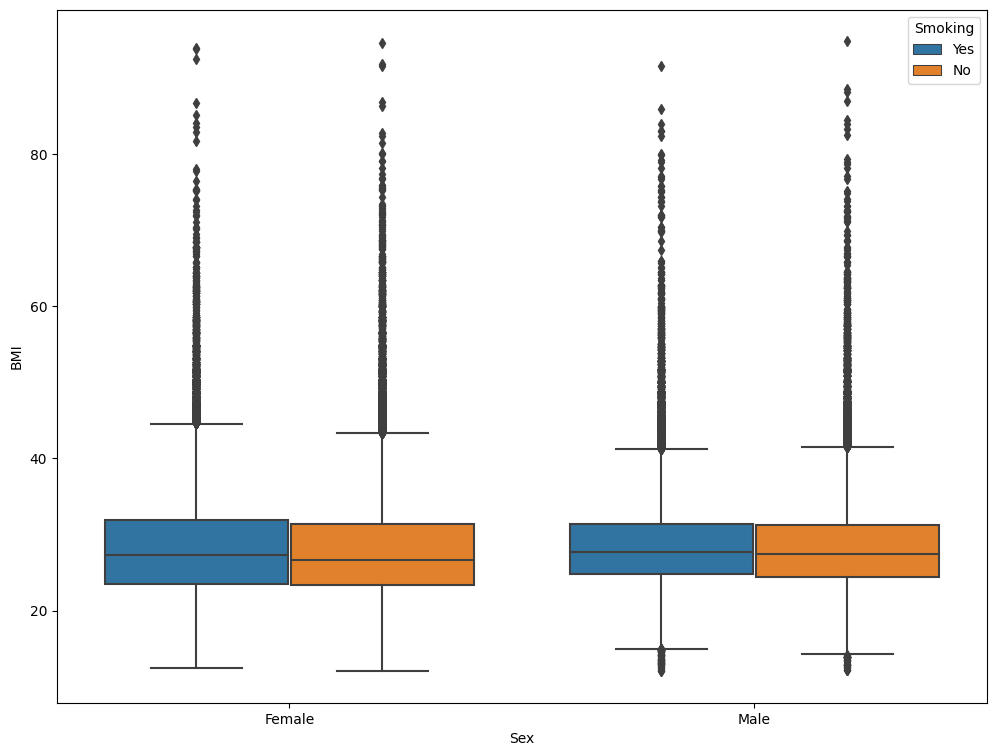

In [18]:
ax, fig = plt.subplots(figsize=[12,9]) # sets figure size
sns.boxplot(y='BMI', x='Sex',hue='Smoking', data=heart_df)
plt.show()

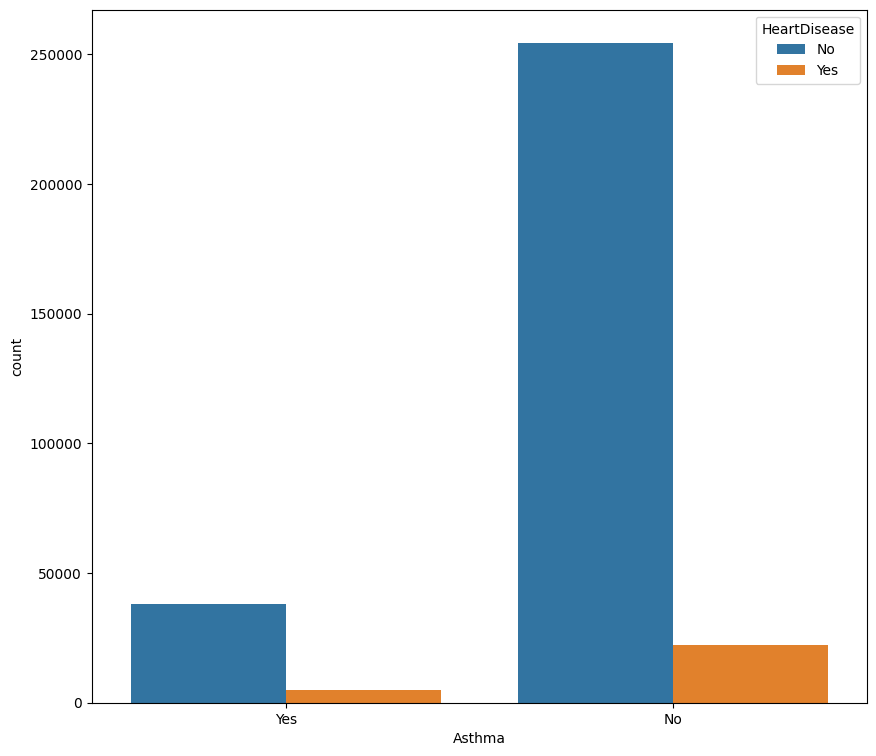

In [19]:
ax, fig = plt.subplots(figsize=[10,9]) # sets figure size
sns.countplot(x='Asthma', hue='HeartDisease', data=heart_df) # for purely categorical
plt.show()

In [20]:
cross_Asthma=pd.crosstab(heart_df.Asthma,heart_df.HeartDisease)
print('Heart Disease + Asthma :',
      round(cross_Asthma.iloc[1,1]/cross_Asthma.iloc[1,0]*100,2),'%')
print('Heart Disease - Asthma :',
      round(cross_Asthma.iloc[0,1]/cross_Asthma.iloc[0,0]*100,2),'%')

Heart Disease + Asthma : 13.0 %
Heart Disease - Asthma : 8.82 %


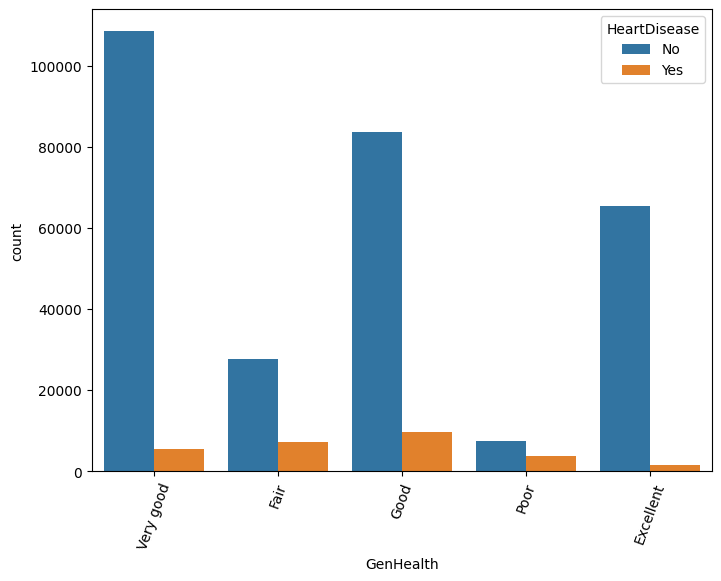

In [21]:
ax, fig= plt.subplots(figsize=[8,6]) # sets
sns.countplot(x='GenHealth',data=heart_df,hue='HeartDisease')
plt.xticks(rotation=70);

In [22]:
cross_GenHealth=pd.crosstab(heart_df.GenHealth,heart_df.HeartDisease)
print('Heart Disease + Poor :',
      round(cross_GenHealth.iloc[3,1]/cross_GenHealth.iloc[3,0]*100,2),'%')
print('Heart Disease + Fair :',
      round(cross_GenHealth.iloc[1,1]/cross_GenHealth.iloc[1,0]*100,2),'%')
print('Heart Disease + Good :',
      round(cross_GenHealth.iloc[2,1]/cross_GenHealth.iloc[2,0]*100,2),'%')
print('Heart Disease + Very Good :',
      round(cross_GenHealth.iloc[4,1]/cross_GenHealth.iloc[4,0]*100,2),'%')
print('Heart Disease + Excellent :',
      round(cross_GenHealth.iloc[0,1]/cross_GenHealth.iloc[0,0]*100,2),'%')

Heart Disease + Poor : 51.75 %
Heart Disease + Fair : 25.67 %
Heart Disease + Good : 11.44 %
Heart Disease + Very Good : 4.96 %
Heart Disease + Excellent : 2.3 %


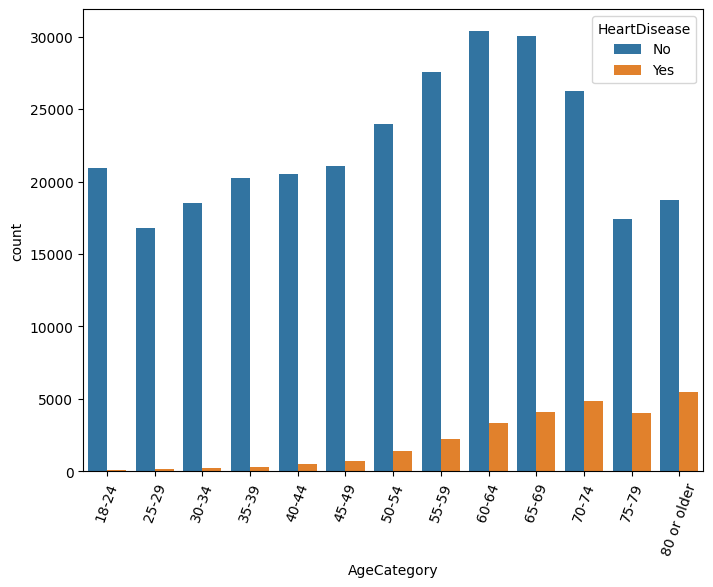

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='AgeCategory',data=heart_df.sort_values(by='AgeCategory'),hue='HeartDisease')
plt.xticks(rotation=70);


In [24]:
cross_AgeCategory=pd.crosstab(heart_df.AgeCategory,heart_df.HeartDisease)
print('Heart Disease + 18-24 :',
      round(cross_AgeCategory.iloc[0,1]/cross_AgeCategory.iloc[0,0]*100,2),'%')
print('Heart Disease + 25-29 :',
      round(cross_AgeCategory.iloc[1,1]/cross_AgeCategory.iloc[1,0]*100,2),'%')
print('Heart Disease + 30-34 :',
      round(cross_AgeCategory.iloc[2,1]/cross_AgeCategory.iloc[2,0]*100,2),'%')
print('Heart Disease + 35-39 :',
      round(cross_AgeCategory.iloc[3,1]/cross_AgeCategory.iloc[3,0]*100,2),'%')
print('Heart Disease + 40-44 :',
      round(cross_AgeCategory.iloc[4,1]/cross_AgeCategory.iloc[4,0]*100,2),'%')
print('Heart Disease + 45-49 :',
      round(cross_AgeCategory.iloc[5,1]/cross_AgeCategory.iloc[5,0]*100,2),'%')
print('Heart Disease + 50-54 :',
      round(cross_AgeCategory.iloc[6,1]/cross_AgeCategory.iloc[6,0]*100,2),'%')
print('Heart Disease + 55-59 :',
      round(cross_AgeCategory.iloc[7,1]/cross_AgeCategory.iloc[7,0]*100,2),'%')
print('Heart Disease + 60-64 :',
      round(cross_AgeCategory.iloc[8,1]/cross_AgeCategory.iloc[8,0]*100,2),'%')
print('Heart Disease + 65-69 :',
      round(cross_AgeCategory.iloc[9,1]/cross_AgeCategory.iloc[9,0]*100,2),'%')
print('Heart Disease + 70-74 :',
      round(cross_AgeCategory.iloc[10,1]/cross_AgeCategory.iloc[10,0]*100,2),'%')
print('Heart Disease + 75-79 :',
      round(cross_AgeCategory.iloc[11,1]/cross_AgeCategory.iloc[11,0]*100,2),'%')
print('Heart Disease + 80 or older :',
      round(cross_AgeCategory.iloc[12,1]/cross_AgeCategory.iloc[12,0]*100,2),'%')

Heart Disease + 18-24 : 0.62 %
Heart Disease + 25-29 : 0.79 %
Heart Disease + 30-34 : 1.22 %
Heart Disease + 35-39 : 1.46 %
Heart Disease + 40-44 : 2.37 %
Heart Disease + 45-49 : 3.53 %
Heart Disease + 50-54 : 5.76 %
Heart Disease + 55-59 : 7.99 %
Heart Disease + 60-64 : 10.96 %
Heart Disease + 65-69 : 13.65 %
Heart Disease + 70-74 : 18.49 %
Heart Disease + 75-79 : 23.23 %
Heart Disease + 80 or older : 29.13 %


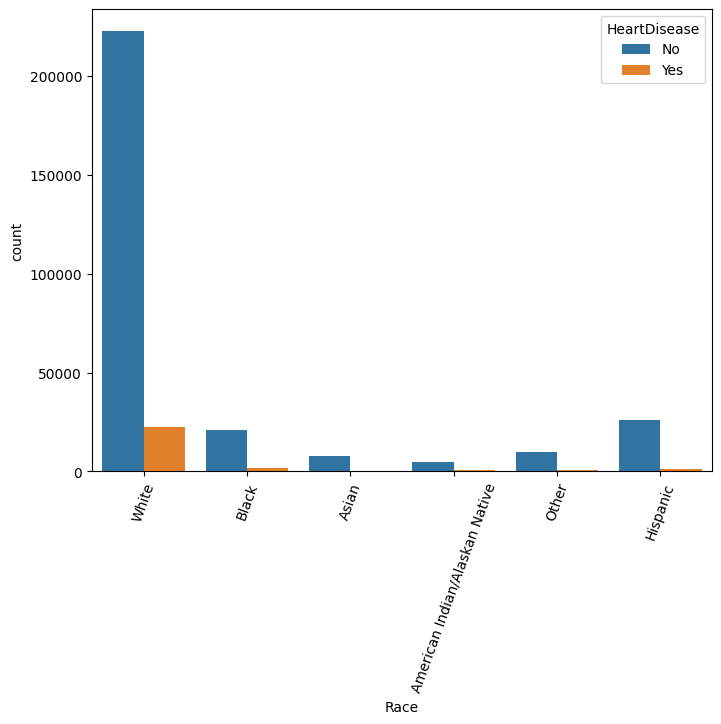

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='Race',data=heart_df,hue='HeartDisease')
plt.xticks(rotation=70);

In [26]:
cross_Race=pd.crosstab(heart_df.Race,heart_df.HeartDisease)
print('Heart Disease + White :',
      round(cross_Race.iloc[5,1]/cross_Race.iloc[5,0]*100,2),'%')
print('Heart Disease + Black :',
      round(cross_Race.iloc[2,1]/cross_Race.iloc[2,0]*100,2),'%')
print('Heart Disease + Asian :',
      round(cross_Race.iloc[1,1]/cross_Race.iloc[1,0]*100,2),'%')
print('Heart Disease + American Indian :',
      round(cross_Race.iloc[0,1]/cross_Race.iloc[0,0]*100,2),'%')
print('Heart Disease + Hispanic :',
      round(cross_Race.iloc[3,1]/cross_Race.iloc[3,0]*100,2),'%')
print('Heart Disease + Other :',
      round(cross_Race.iloc[4,1]/cross_Race.iloc[4,0]*100,2),'%')

Heart Disease + White : 10.11 %
Heart Disease + Black : 8.15 %
Heart Disease + Asian : 3.41 %
Heart Disease + American Indian : 11.63 %
Heart Disease + Hispanic : 5.55 %
Heart Disease + Other : 8.82 %


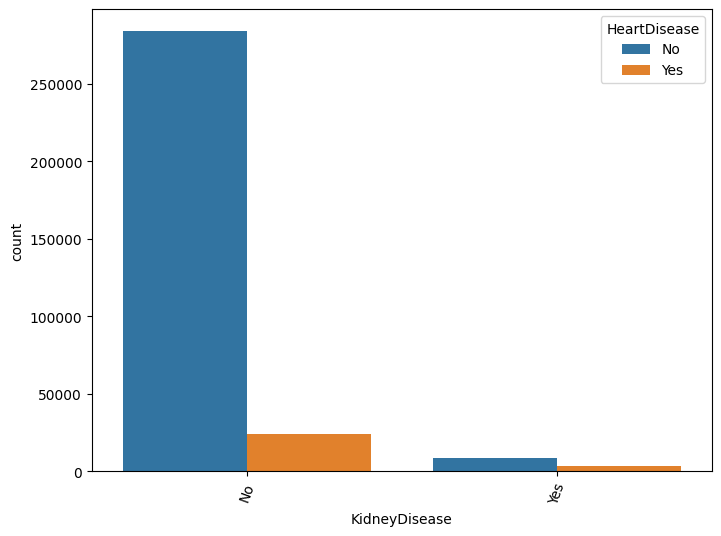

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='KidneyDisease',data=heart_df,hue='HeartDisease')
plt.xticks(rotation=70);

In [28]:
cross_KidneyDisease=pd.crosstab(heart_df.KidneyDisease,heart_df.HeartDisease)
print('Heart Disease + KidneyDisease :',
      round(cross_KidneyDisease.iloc[1,1]/cross_KidneyDisease.iloc[1,0]*100,2),'%')
print('Heart Disease - KidneyDisease :',
      round(cross_KidneyDisease.iloc[0,1]/cross_KidneyDisease.iloc[0,0]*100,2),'%')

Heart Disease + KidneyDisease : 41.51 %
Heart Disease - KidneyDisease : 8.42 %


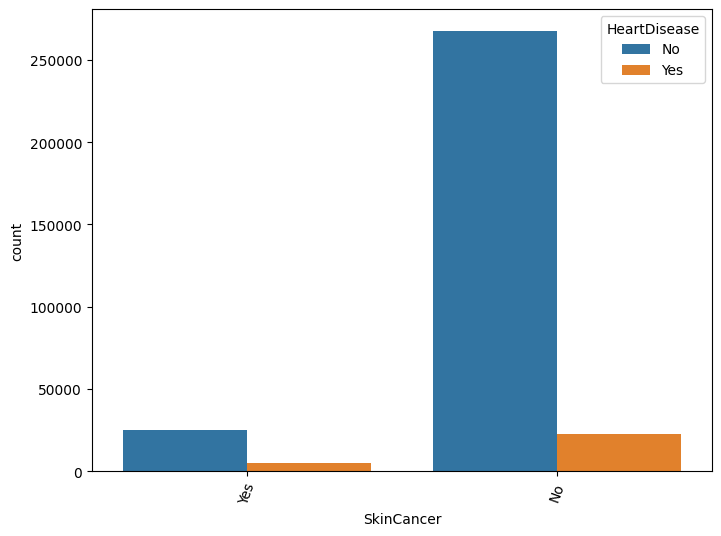

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='SkinCancer',data=heart_df,hue='HeartDisease')
plt.xticks(rotation=70);

In [30]:
cross_SkinCancer=pd.crosstab(heart_df.SkinCancer,heart_df.HeartDisease)
print('Heart Disease + SkinCancer :',
      round(cross_SkinCancer.iloc[1,1]/cross_SkinCancer.iloc[1,0]*100,2),'%')
print('Heart Disease - SkinCancer :',
      round(cross_SkinCancer.iloc[0,1]/cross_SkinCancer.iloc[0,0]*100,2),'%')

Heart Disease + SkinCancer : 20.05 %
Heart Disease - SkinCancer : 8.37 %


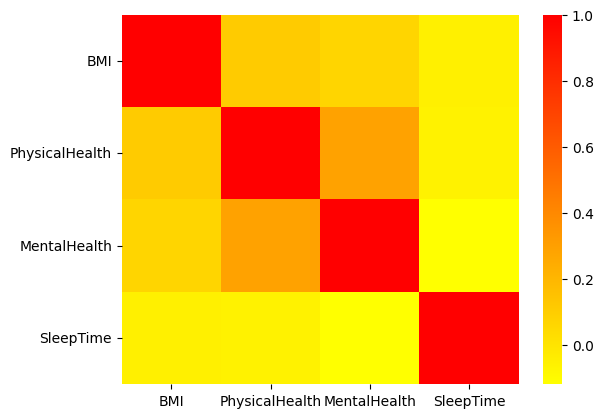

In [31]:
sns.heatmap(heart_df.corr(),cmap='autumn_r');

In [ ]:
sns.pairplot(heart_df,hue='HeartDisease');

## Import models and model selection module

In [ ]:
#Scikit-Learn is a free software machine Learning Library for the Python language.train_test_split
#Machine Learning algorithms.
from sklearn.linear_model import LinearRegression


#import training and testing module 
from sklearn.model_selection import train_test_split


## Instantiate the models

In [ ]:
model=LinearRegression()

## Train test split

In [ ]:
# First need to split dataset into training and testing( input(X)/output(y))
#pandas.iloc[rows,columns]
X= heart_df
y = heart_df['MentalHealth']

In [ ]:
X

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [ ]:
#Split the dataset into training and testing
XTrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
Xtest

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
301988           No  24.30      No              No     No             0.0   
223127          Yes  23.78     Yes              No    Yes             0.0   
216797           No  20.60     Yes              No     No             0.0   
234217           No  28.29     Yes              No     No             0.0   
30822           Yes  33.00      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
184518           No  20.92     Yes              No     No             0.0   
272494           No  24.19      No              No     No             3.0   
205144          Yes  34.09     Yes              No     No            28.0   
182600           No  41.57      No              No     No             0.0   
217313           No  22.67      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
301988          15.0          No  Female        40-44  White       No   
223127           0.0         Yes  Female  80 or older  Black      Yes   
216797           0.0          No  Female        70-74  White       No   
234217          20.0          No  Female        25-29  White       No   
30822            0.0          No    Male        75-79  White      Yes   
...              ...         ...     ...          ...    ...      ...   
184518           0.0          No    Male        75-79  White       No   
272494           0.0          No  Female        18-24  White       No   
205144           0.0          No    Male        60-64  White       No   
182600           1.0         Yes  Female        70-74  White      Yes   
217313           0.0          No  Female  80 or older  White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
301988              Yes  Excellent        7.0     No            No         No  
223127               No       Good        7.0     No            No         No  
216797              Yes       Good        7.0     No            No         No  
234217               No       Good        4.0     No            No         No  
30822               Yes  Excellent        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
184518              Yes  Excellent       12.0     No            No        Yes  
272494              Yes  Very good        7.0    Yes            No         No  
205144              Yes       Good        7.0     No            No         No  
182600               No       Good        4.0    Yes            No         No  
217313              Yes       Good        7.0     No            No         No  

[63959 rows x 18 columns]

In [ ]:
_deepnote_run_altair(Xtest, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"HeartDisease","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"BMI","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
_deepnote_run_altair(Xtest, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"HeartDisease","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"BMI","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
ytest

301988    15.0
223127     0.0
216797     0.0
234217    20.0
30822      0.0
          ... 
184518     0.0
272494     0.0
205144     0.0
182600     1.0
217313     0.0
Name: MentalHealth, Length: 63959, dtype: float64

In [ ]:
ytrain

291133     0.0
309330     0.0
307280     5.0
7469      14.0
33630      0.0
          ... 
117583     0.0
73349      0.0
312201     0.0
267336     5.0
128037     4.0
Name: MentalHealth, Length: 255836, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np


In [ ]:
heart_df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [ ]:
X = heart_df.iloc[:,:-1].values
y=heart_df.iloc[:,4].values

In [ ]:
X

array([['No', 16.6, 'Yes', ..., 5.0, 'Yes', 'No'],
       ['No', 20.34, 'No', ..., 7.0, 'No', 'No'],
       ['No', 26.58, 'Yes', ..., 8.0, 'Yes', 'No'],
       ...,
       ['No', 24.24, 'No', ..., 6.0, 'No', 'No'],
       ['No', 32.81, 'No', ..., 12.0, 'No', 'No'],
       ['No', 46.56, 'No', ..., 8.0, 'No', 'No']], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest,ytrain,ytest= train_test_split (X,y,test_size=0.20)

In [ ]:
df = pd.read_csv('/work/archive-20220531-152154/heart_2020_cleaned.csv', index_col=0)
non_floats = []
for col in df:
    if df[col].dtypes != "float64":
        non_floats.append(col)
df = df.drop(columns=non_floats)

In [ ]:
df

BMI  PhysicalHealth  MentalHealth  SleepTime
HeartDisease                                                
No            16.60             3.0          30.0        5.0
No            20.34             0.0           0.0        7.0
No            26.58            20.0          30.0        8.0
No            24.21             0.0           0.0        6.0
No            23.71            28.0           0.0        8.0
...             ...             ...           ...        ...
Yes           27.41             7.0           0.0        6.0
No            29.84             0.0           0.0        5.0
No            24.24             0.0           0.0        6.0
No            32.81             0.0           0.0       12.0
No            46.56             0.0           0.0        8.0

[319795 rows x 4 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform


ValueError: could not convert string to float: 'No'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(Xtrain,ytrain).values()

ValueError: could not convert string to float: 'No'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5032a196-dce0-4509-a217-2b2b4586d05b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>